In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/kaggle/input/amazon-stocks-2025/AMZN_stock_data.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0


In [4]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,6987.000000,6987.000000,6987.000000,6987.000000,6.987000e+03,6987.0,6987.000000
mean,40.692696,41.165619,40.178290,40.685061,1.360552e+08,0.0,0.003864
std,58.144182,58.787641,57.435304,58.125169,1.375735e+08,0.0,0.244286
min,0.070313,0.072396,0.065625,0.069792,9.744000e+06,0.0,0.000000
25%,2.100250,2.148250,2.064250,2.110000,6.298900e+07,0.0,0.000000
50%,9.041500,9.158500,8.925000,9.021000,1.005360e+08,0.0,0.000000
75%,72.789249,73.643497,71.504250,73.006500,1.555070e+08,0.0,0.000000
max,239.020004,242.520004,238.029999,242.059998,2.086584e+09,0.0,20.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6987 entries, 0 to 6986
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6987 non-null   object 
 1   Open          6987 non-null   float64
 2   High          6987 non-null   float64
 3   Low           6987 non-null   float64
 4   Close         6987 non-null   float64
 5   Volume        6987 non-null   int64  
 6   Dividends     6987 non-null   float64
 7   Stock Splits  6987 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 436.8+ KB


In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

<ipython-input-7-3fd75451f7d3>:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


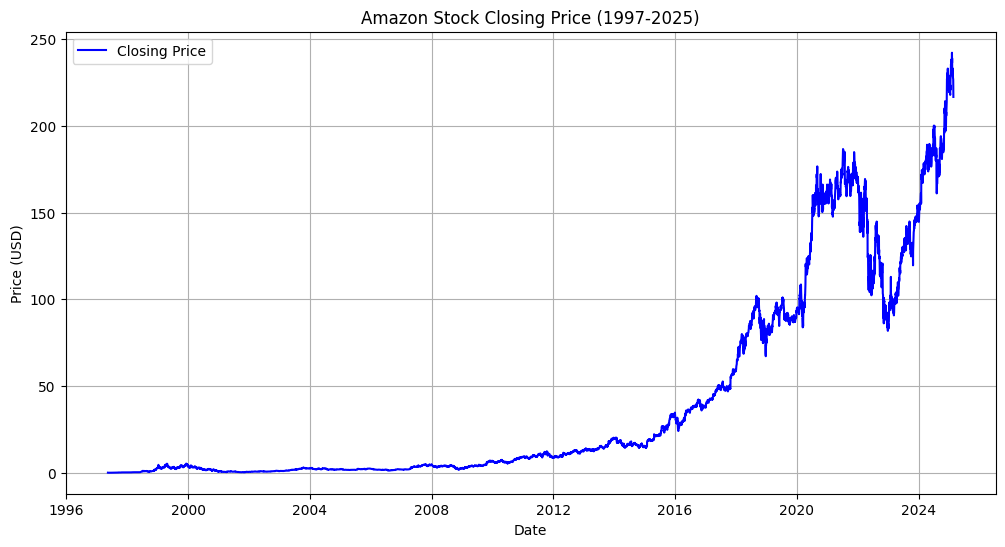

In [7]:
import matplotlib.pyplot as plt

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.title('Amazon Stock Closing Price (1997-2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

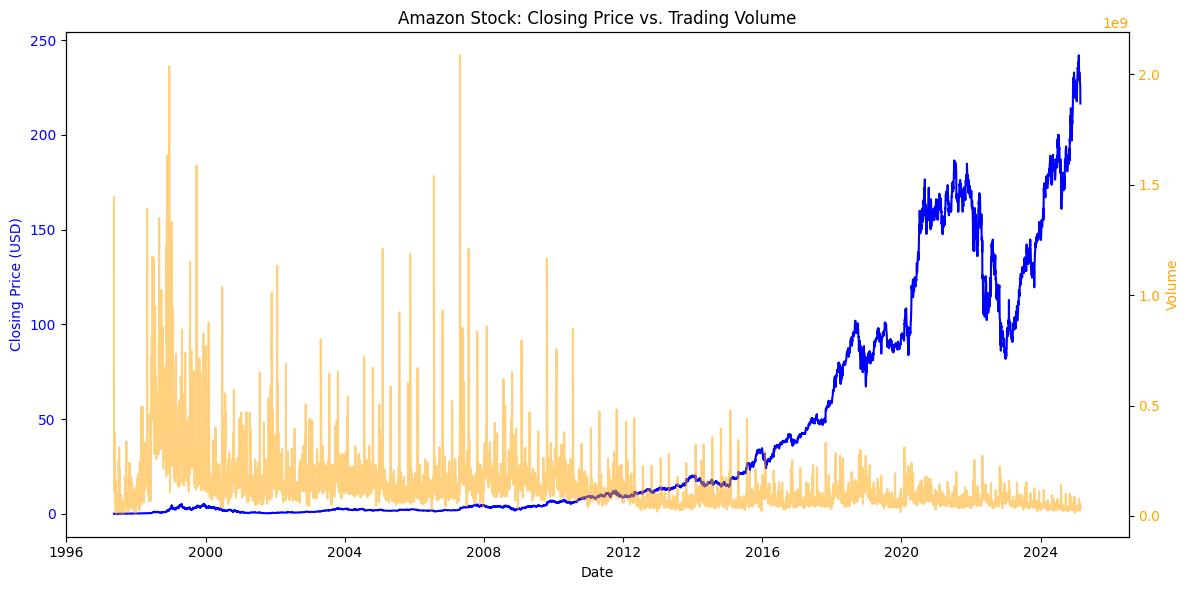

In [11]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Closing Price
ax1.plot(df['Date'], df['Close'], color='blue', label='Closing Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second axis for Volume
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['Volume'], color='orange', label='Volume', alpha=0.5)
ax2.set_ylabel('Volume', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Amazon Stock: Closing Price vs. Trading Volume')
fig.tight_layout()
plt.show()

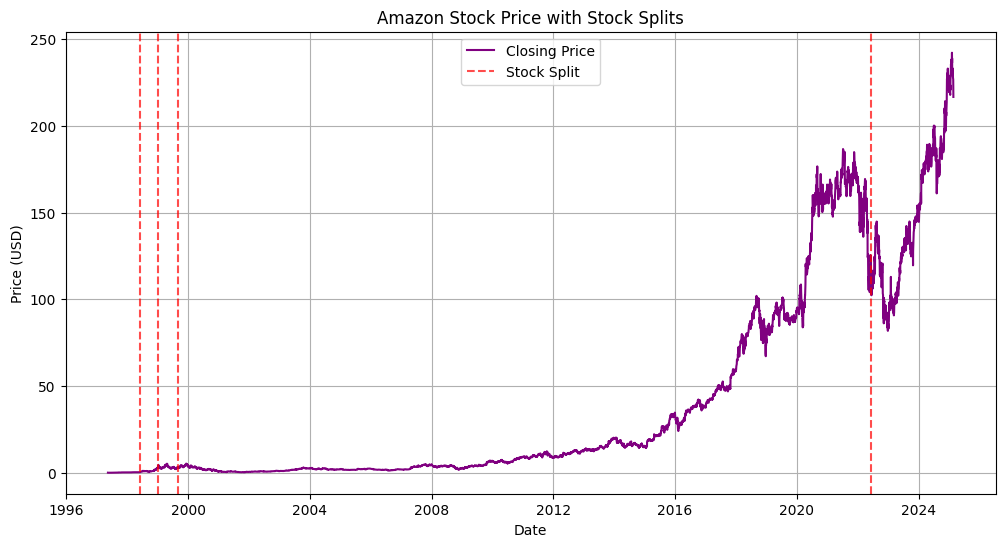

In [12]:
plt.figure(figsize=(12, 6))

# Plot closing price
plt.plot(df['Date'], df['Close'], label='Closing Price', color='purple')

# Add vertical lines for stock splits
splits = df[df['Stock Splits'] > 0]
for split_date in splits['Date']:
    plt.axvline(x=split_date, color='red', linestyle='--', alpha=0.7, label='Stock Split' if split_date == splits['Date'].iloc[0] else "")

plt.title('Amazon Stock Price with Stock Splits')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

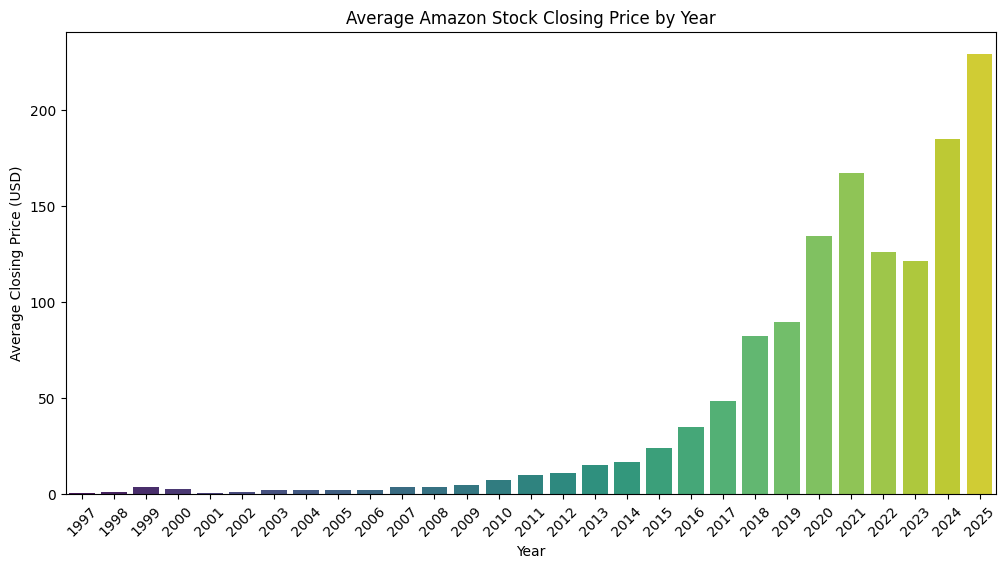

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already loaded from the CSV
# Convert Date to datetime, handling timezone-aware dates as UTC
df['Date'] = pd.to_datetime(df['Date'], utc=True)

# Extract year from Date
df['Year'] = df['Date'].dt.year

# Calculate yearly average closing price
yearly_avg = df.groupby('Year')['Close'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Close', data=yearly_avg, palette='viridis')
plt.title('Average Amazon Stock Closing Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Closing Price (USD)')
plt.xticks(rotation=45)
plt.show()

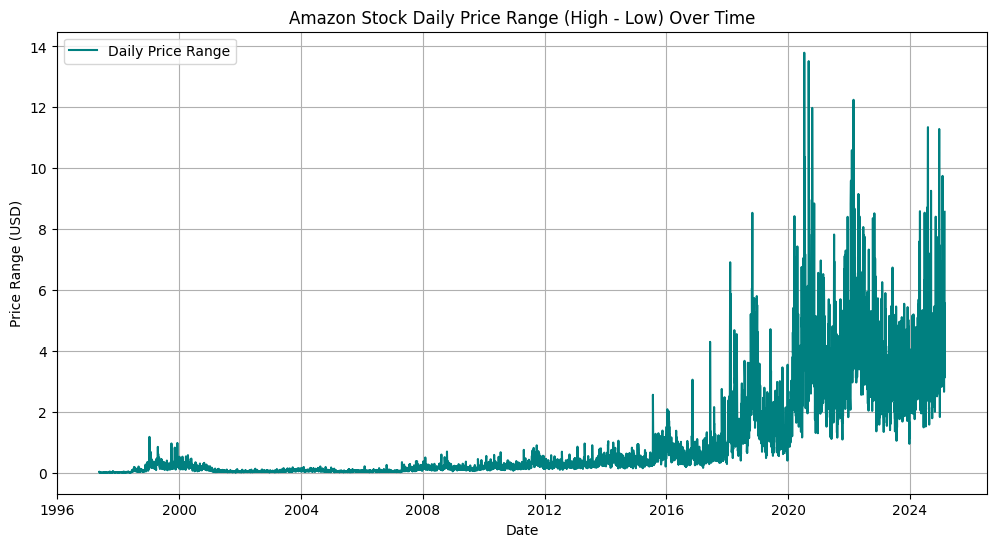

In [16]:
import matplotlib.pyplot as plt

# Calculate daily price range
df['Price_Range'] = df['High'] - df['Low']

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price_Range'], color='teal', label='Daily Price Range')
plt.title('Amazon Stock Daily Price Range (High - Low) Over Time')
plt.xlabel('Date')
plt.ylabel('Price Range (USD)')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


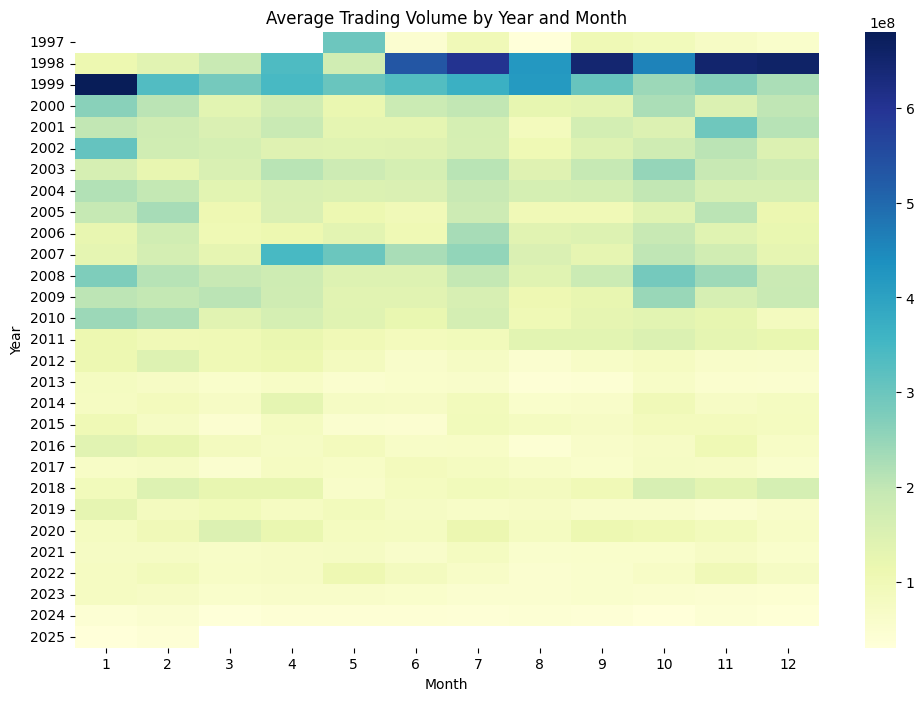

In [17]:
import seaborn as sns

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Pivot table for heatmap
volume_pivot = df.pivot_table(values='Volume', index='Year', columns='Month', aggfunc='mean')

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(volume_pivot, cmap='YlGnBu', annot=False, fmt='.0f')
plt.title('Average Trading Volume by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

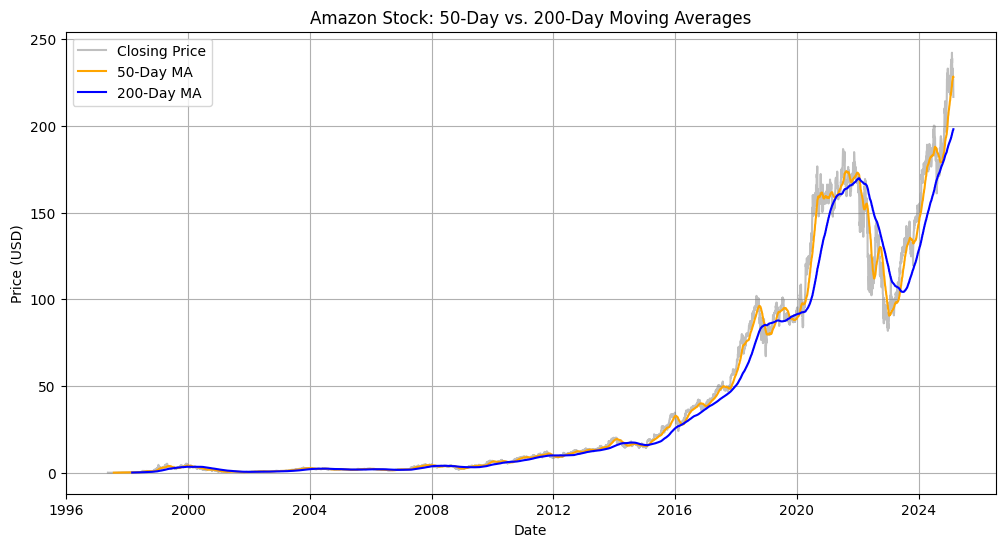

In [18]:
# Calculate moving averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='gray', alpha=0.5)
plt.plot(df['Date'], df['MA50'], label='50-Day MA', color='orange')
plt.plot(df['Date'], df['MA200'], label='200-Day MA', color='blue')
plt.title('Amazon Stock: 50-Day vs. 200-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


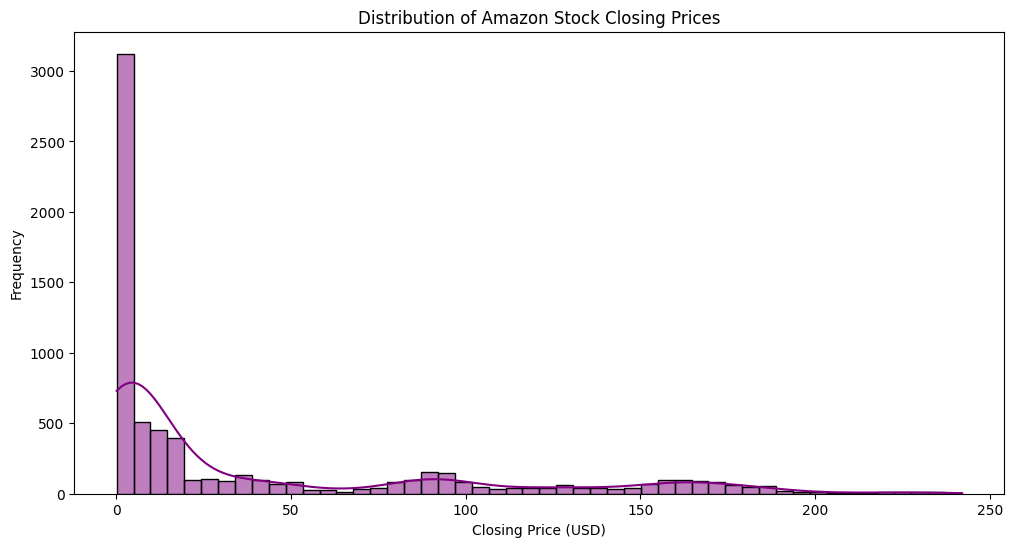

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Close'], bins=50, color='purple', kde=True)
plt.title('Distribution of Amazon Stock Closing Prices')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Frequency')
plt.show()

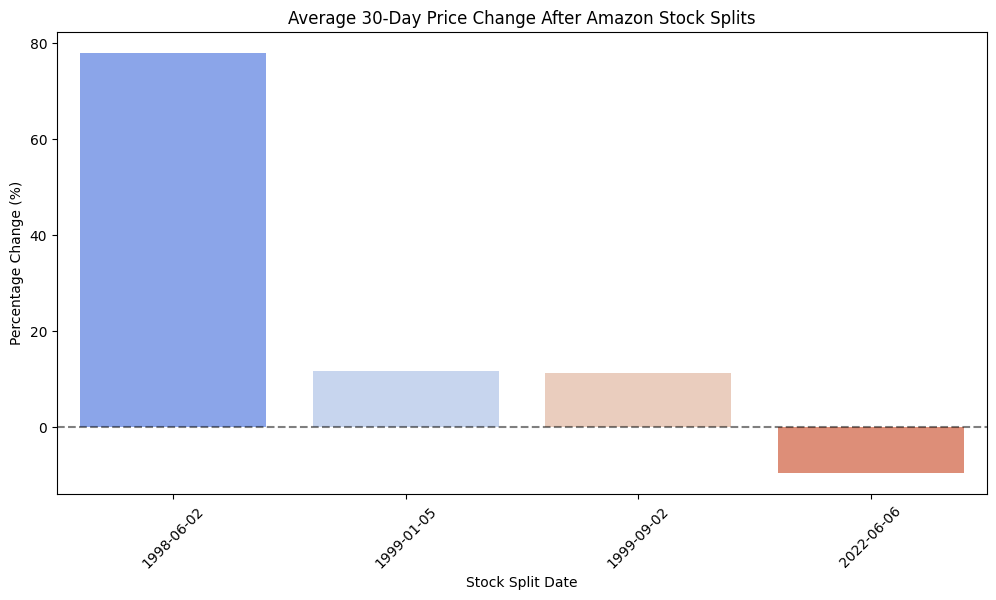

In [20]:
# Identify stock split dates
split_dates = df[df['Stock Splits'] > 0]['Date']

# Calculate percentage change 30 days after each split
split_effects = []
for split_date in split_dates:
    pre_split_price = df[df['Date'] < split_date]['Close'].iloc[-1]
    post_split_df = df[(df['Date'] > split_date) & (df['Date'] <= split_date + pd.Timedelta(days=30))]
    if not post_split_df.empty:
        avg_post_split_price = post_split_df['Close'].mean()
        pct_change = ((avg_post_split_price - pre_split_price) / pre_split_price) * 100
        split_effects.append({'Date': split_date, 'Pct_Change': pct_change})

split_effects_df = pd.DataFrame(split_effects)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=split_effects_df['Date'].dt.strftime('%Y-%m-%d'), y='Pct_Change', data=split_effects_df, palette='coolwarm')
plt.title('Average 30-Day Price Change After Amazon Stock Splits')
plt.xlabel('Stock Split Date')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.show()

Epoch [10/100], Loss: 0.0080
Epoch [20/100], Loss: 0.0035
Epoch [30/100], Loss: 0.0004
Epoch [40/100], Loss: 0.0004
Epoch [50/100], Loss: 0.0002
Epoch [60/100], Loss: 0.0001
Epoch [70/100], Loss: 0.0000
Epoch [80/100], Loss: 0.0000
Epoch [90/100], Loss: 0.0000
Epoch [100/100], Loss: 0.0000


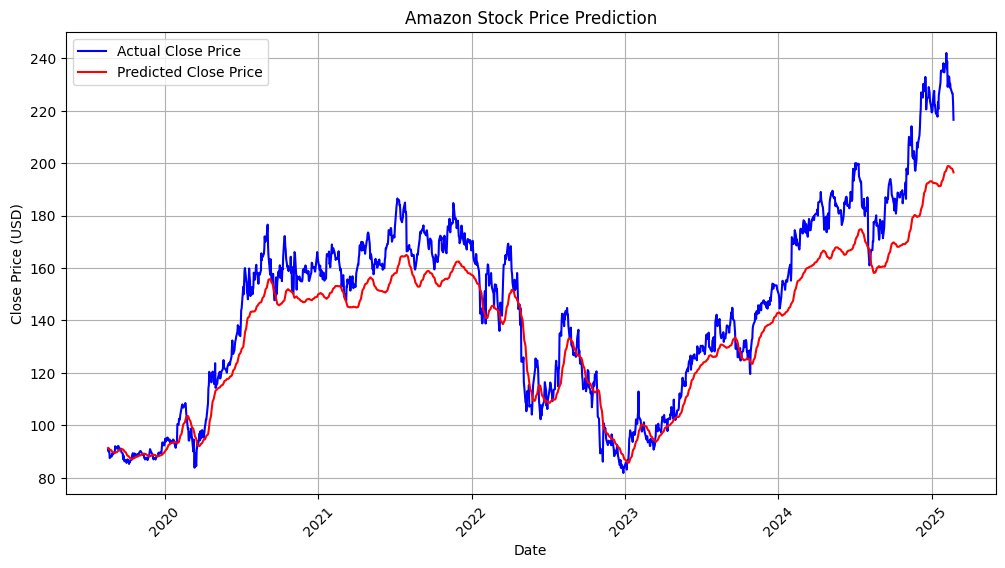

Mean Squared Error on Test Set: 188.9605


In [21]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load and preprocess the data
df['Date'] = pd.to_datetime(df['Date'], utc=True)

# Use only the 'Close' price for simplicity (can add more features later)
data = df[['Close']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for time-series prediction
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Use 60 days of past data to predict the next day
X, y = create_sequences(scaled_data, seq_length)

# Split into train and test sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

# Define the LSTM model
class StockPredictor(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2):
        super(StockPredictor, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # Initialize hidden state and cell state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward pass through LSTM
        out, _ = self.lstm(x, (h0, c0))
        # Take the output from the last time step
        out = self.fc(out[:, -1, :])
        return out

# Initialize the model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = StockPredictor(input_size=1, hidden_size=50, num_layers=2).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
X_train, y_train = X_train.to(device), y_train.to(device)
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    optimizer.zero_grad()
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
X_test = X_test.to(device)
with torch.no_grad():
    y_pred = model(X_test)

# Convert predictions and test data back to original scale
y_test = y_test.cpu().numpy()
y_pred = y_pred.cpu().numpy()
y_test_unscaled = scaler.inverse_transform(y_test)
y_pred_unscaled = scaler.inverse_transform(y_pred)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].iloc[train_size + seq_length:], y_test_unscaled, label='Actual Close Price', color='blue')
plt.plot(df['Date'].iloc[train_size + seq_length:], y_pred_unscaled, label='Predicted Close Price', color='red')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Calculate and print Mean Squared Error
mse = np.mean((y_test_unscaled - y_pred_unscaled) ** 2)
print(f'Mean Squared Error on Test Set: {mse:.4f}')